In [1]:
import os.path
import mne
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data_path = '/Volumes/Guillaume EEG Project/Berlin_Data/EEG/raw'

In [3]:
file_path = os.path.join(data_path, '2/2_20220404T191254.edf')
print(file_path)

/Volumes/Guillaume EEG Project/Berlin_Data/EEG/raw/2/2_20220404T191254.edf


In [4]:
raw = mne.io.read_raw_edf(file_path)

Extracting EDF parameters from /Volumes/Guillaume EEG Project/Berlin_Data/EEG/raw/2/2_20220404T191254.edf...
EDF file detected


/var/folders/__/_mvd8zq52lg_gsx5r35nrpcw0000gn/T/ipykernel_18142/294580556.py:1: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = mne.io.read_raw_edf(file_path)


ValueError: invalid literal for int() with base 10: 'L Versio'

In [5]:
raw = mne.io.read_raw_brainvision(os.path.join(data_path, '2/2.vhdr'))

Extracting parameters from /Volumes/Guillaume EEG Project/Berlin_Data/EEG/raw/2/2.vhdr...
Setting channel info structure...


Using matplotlib as 2D backend.


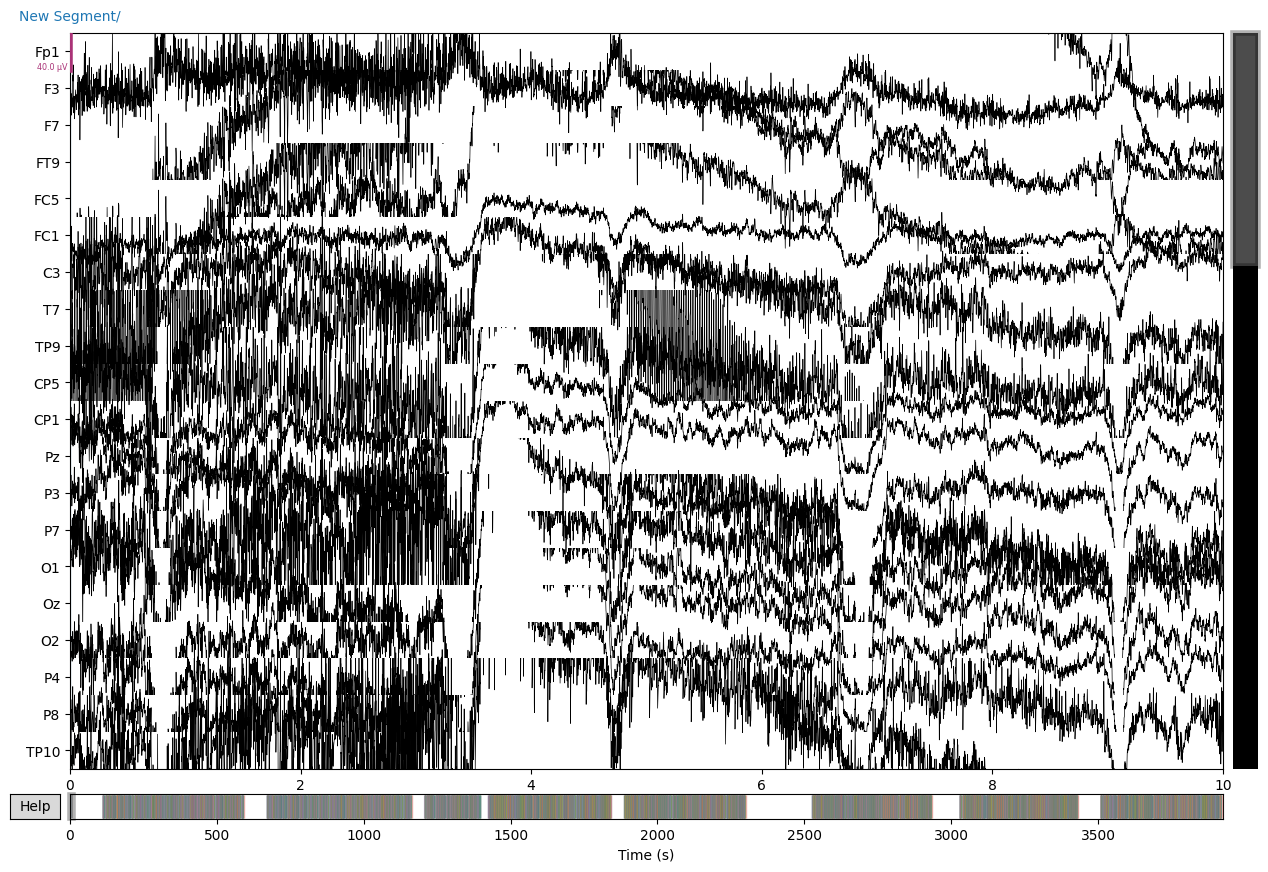

In [6]:
raw.plot()
plt.show()

In [14]:
print(raw.info)
print(raw.info.ch_names)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, P7, ...
 chs: 63 EEG
 custom_ref_applied: False
 dig: 66 items (3 Cardinal, 63 EEG)
 highpass: 0.0 Hz
 lowpass: 280.0 Hz
 meas_date: 2022-04-04 18:06:20 UTC
 nchan: 63
 projs: []
 sfreq: 1000.0 Hz
>
['Fp1', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'AF8', 'AF4', 'F2', 'FCz']


In [10]:
def calculate_mean_lapse_rate():
    directory_content = os.listdir(data_path)

    correct = {'hc': 0, 'scz': 0}
    trial_n = {'hc': 0, 'scz': 0}
    trial_n_drop_NA = {'hc': 0, 'scz': 0}

    for folder in directory_content:

        if folder.isdigit():
            subdirectory_content = os.listdir(os.path.join(data_path, folder))

            # TODO: correct condition for subject label
            subject = 'scz' if '{}_scz.eeg'.format(folder) in subdirectory_content else 'hc'

            for filename in filter(lambda k: 'results.csv' in k, subdirectory_content):
                temp = pd.read_csv(os.path.join(data_path, folder, filename), usecols=['correct'])
                correct[subject] += np.nansum(temp)
                trial_n[subject] += len(temp)
                trial_n_drop_NA[subject] += len(temp.dropna())

    lapse_rate = {'hc': (trial_n['hc'] - correct['hc']) / trial_n['hc'],
                  'scz': (trial_n['scz'] - correct['scz']) / trial_n['scz']}
    lapse_rate_drop_NA = {'hc': (trial_n_drop_NA['hc'] - correct['hc']) / trial_n_drop_NA['hc'],
                          'scz': (trial_n_drop_NA['scz'] - correct['scz']) / trial_n_drop_NA['scz']}

    return lapse_rate, lapse_rate_drop_NA


In [11]:
calculate_mean_lapse_rate()

pydev debugger: Unable to find real location for: /var/folders/__/_mvd8zq52lg_gsx5r35nrpcw0000gn/T/ipykernel_18142/3813238669.py
pydev debugger: Unable to find real location for: /var/folders/__/_mvd8zq52lg_gsx5r35nrpcw0000gn/T/ipykernel_18142/2974401679.py


ZeroDivisionError: division by zero